In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
#Leemos el CSV
nlp = pd.read_csv('../data/train.csv')

In [3]:
nlp.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
nlp.shape

(7613, 5)

In [5]:
nlp['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

# Analisis de keywords

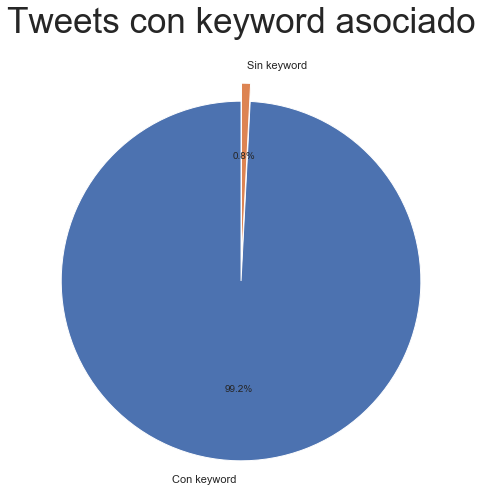

In [49]:
sin_keyword = nlp['keyword'].isnull().sum()
con_keyword = nlp['keyword'].count()-sin_keyword

sizes = [con_keyword, sin_keyword]
nombres = ["Con keyword", "Sin keyword"]

plt.figure(figsize=(11.7, 8.27))
plt.title('Tweets con keyword asociado', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.show()

In [75]:
cant_keyword = nlp['keyword'].value_counts().iloc[:20]
cant_keyword

fatalities     45
deluge         42
armageddon     42
body%20bags    41
sinking        41
harm           41
damage         41
twister        40
outbreak       40
siren          40
evacuate       40
collided       40
fear           40
windstorm      40
sinkhole       39
hellfire       39
wreckage       39
explosion      39
weapons        39
derailment     39
Name: keyword, dtype: int64

Text(0, 0.5, 'Keyword')

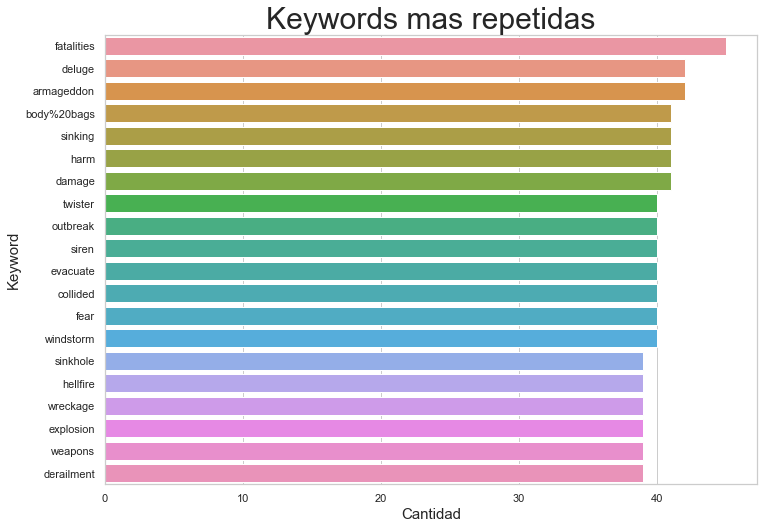

In [79]:
#KEYWORDS MAS POPULARES PARA TODOS LOS TARGET
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=cant_keyword.values, y=cant_keyword.index)

ax.set_title("Keywords mas repetidas",fontsize=30)
ax.set_xlabel("Cantidad",fontsize=15)
ax.set_ylabel("Keyword",fontsize=15)

In [9]:
target1 = nlp[nlp['target']==1]
cant_keyword_target1 = target1['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

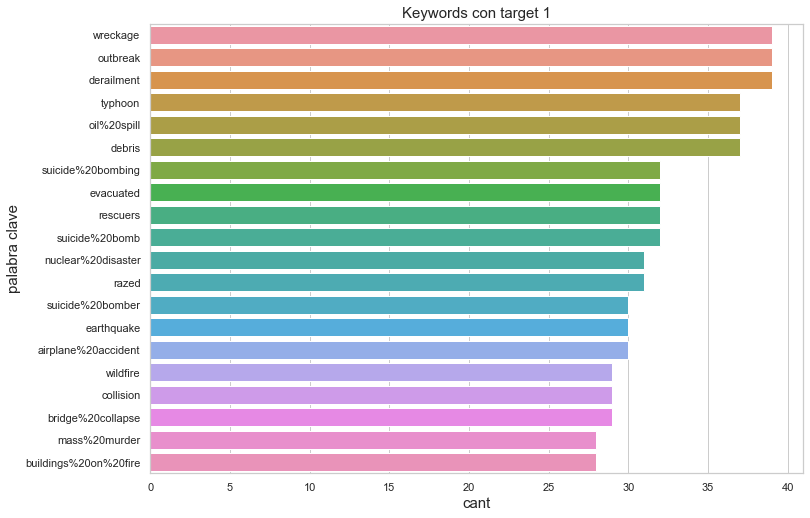

In [10]:
#KEYWORDS MAS POPULARES PARA TARGET 1
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=cant_keyword_target1.values, y=cant_keyword_target1.index)

ax.set_title("Keywords con target 1",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [11]:
target0 = nlp[nlp['target']==0]
cant_keyword_target0 = target0['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

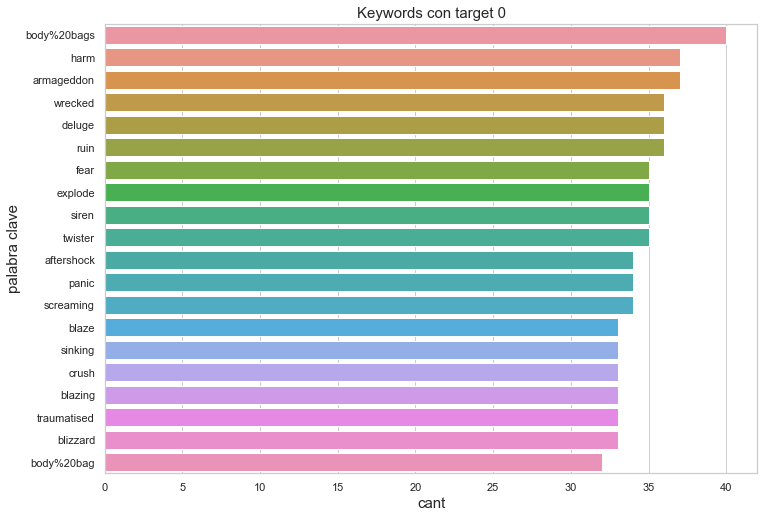

In [12]:
#KEYWORDS MAS POPULARES PARA TARGET 0
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=cant_keyword_target0.values, y=cant_keyword_target0.index)

ax.set_title("Keywords con target 0",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [13]:
keywords_df = nlp.groupby(['keyword', 'target'])[['text']].count().reset_index()
keywords_df['populares'] = keywords_df['keyword'].isin(cant_keyword.index)
keywords_df = keywords_df[keywords_df['populares']==True].sort_values(by='text', ascending=False)
keywords_df.head()

,keyword,target,text,populares
57,body%20bags,0,40,True
435,wreckage,1,39,True
138,derailment,1,39,True
304,outbreak,1,39,True
15,armageddon,0,37,True


Text(0, 0.5, 'Keyword')

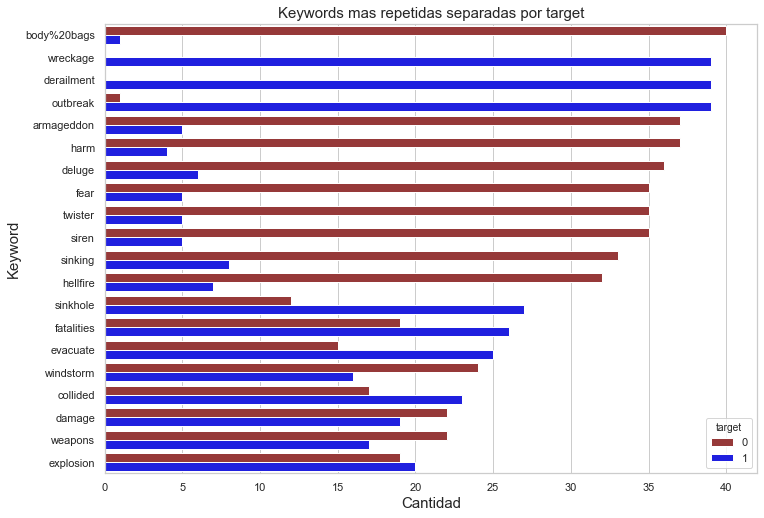

In [62]:
#COMPARACION ENTRE TARGET 1 Y TARGET 0 DE LAS KEYWORDS MAS POPULARES PARA LOS 2
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))



ax = sns.barplot(x='text', y='keyword', hue='target', data=keywords_df, palette=["brown", "blue"])

ax.set_title("Keywords mas repetidas separadas por target",fontsize=15)
ax.set_xlabel("Cantidad",fontsize=15)
ax.set_ylabel("Keyword",fontsize=15)

In [15]:
cant_keyword = nlp['keyword'].value_counts().iloc[:20]
cant_keyword.head(3)

fatalities    45
deluge        42
armageddon    42
Name: keyword, dtype: int64

In [77]:
df_target1 = keywords_df[keywords_df['target']==1].reset_index().rename(columns={'text':'cant_target1'})
df_target0 = keywords_df[keywords_df['target']==0].reset_index().rename(columns={'text':'cant_target0'})
df_totales = df_target1.merge(df_target0, how='outer', on='keyword')[['keyword', 'cant_target1', 'cant_target0' ]]
df_totales.fillna(0, inplace=True)
df_totales['cant_totales'] = df_totales['cant_target1'] + df_totales['cant_target0']
df_totales.sort_values(by='cant_totales', ascending = False, inplace=True)
df_totales.head(50)

,keyword,cant_target1,cant_target0,cant_totales
4,fatalities,26,19.0,45.0
17,armageddon,5,37.0,42.0
13,deluge,6,36.0,42.0
19,body%20bags,1,40.0,41.0
11,sinking,8,33.0,41.0
18,harm,4,37.0,41.0
8,damage,19,22.0,41.0
16,twister,5,35.0,40.0
15,siren,5,35.0,40.0
14,fear,5,35.0,40.0


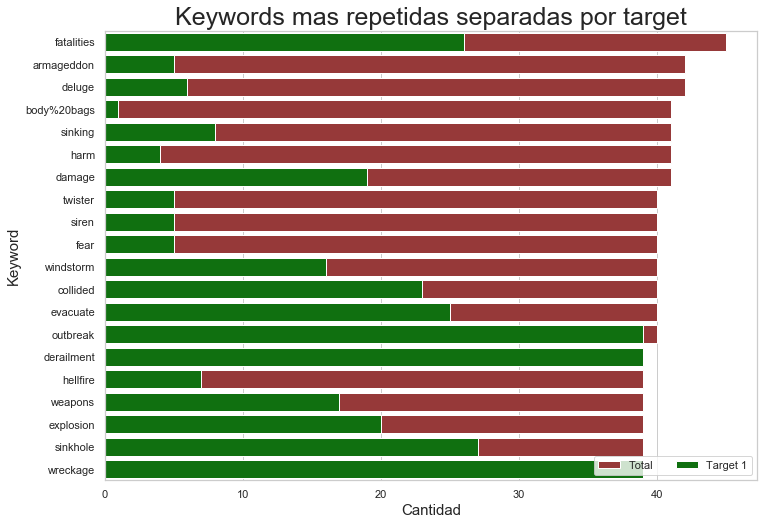

In [78]:
#COMPARACION ENTRE TARGET 1 Y TARGET 0 DE LAS KEYWORDS MAS POPULARES PARA LOS 2
# Tamaño para hojas A4.
f, ax = plt.subplots(figsize=(11.7, 8.27))


sns.barplot(x='cant_totales', y='keyword', data=df_totales, label="Total", color="brown")            
sns.barplot(x='cant_target1', y="keyword", data=df_totales, label="Target 1", color="green")

ax.set_title("Keywords mas repetidas separadas por target",fontsize=25)
ax.set_xlabel("Cantidad",fontsize=15)
ax.set_ylabel("Keyword",fontsize=15)

ax.legend(ncol=2, loc="lower right", frameon=True)


In [18]:
#palabras que hacen ref a tragedias
selected_words_singular=['fire','flood','inundate','earthquake','quake','deluge','euption','twister','tornado','hurricane', 'landslide','typhoon','wildfire','forest fire','drought','avalanche','urgent','important','danger','warrning','evacuation']
selected_words_plural=['fires','floods', 'earthquakes','quakes','deluges','rashes','tornadoes','hurricanes', 'landslides','typhoons','wildfires','forest fires','droughts','avalanches']
selected_words_other=['heat wave','died','flooding','flooded','damage','urgent','important','danger','warrning','help','evacuation']
col_one_list = nlp['keyword'].tolist()
selected_words = selected_words_singular + selected_words_plural + selected_words_other + col_one_list
s = set(selected_words)

In [19]:

nlp['words'] = nlp.text.str.strip().str.split()
palabras_tragedias = nlp.assign(matches=[len(set(el) & s) for el in nlp.words]).dropna()
palabras_tragedias.head()


,id,keyword,location,text,target,words,matches
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,"[@bbcmtd, Wholesale, Markets, ablaze, http://t...",1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,"[We, always, try, to, bring, the, heavy., #met...",0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,"[#AFRICANBAZE:, Breaking, news:Nigeria, flag, ...",1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,"[Crying, out, for, more!, Set, me, ablaze]",1
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,"[On, plus, side, LOOK, AT, THE, SKY, LAST, NIG...",0


In [20]:
df_keywords_matched =  palabras_tragedias[palabras_tragedias['matches']!=1]
df_keywords_unmatched =  palabras_tragedias[palabras_tragedias['matches']==0]

list_keywords_matched = df_keywords_matched['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

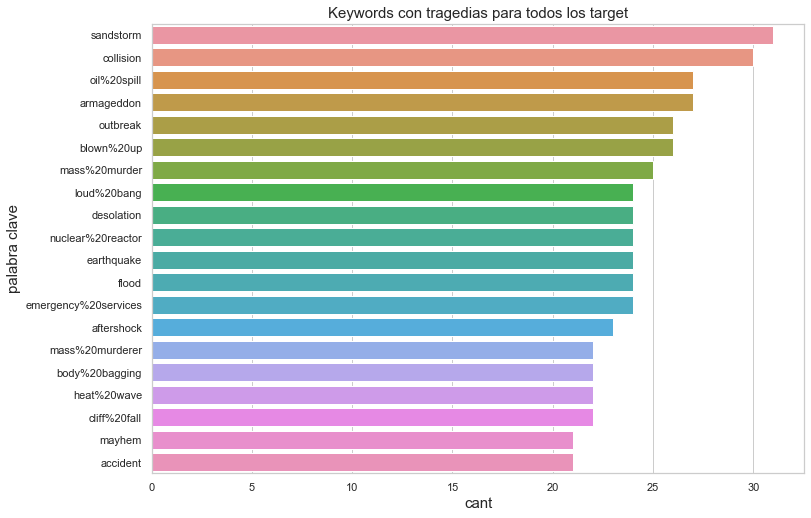

In [21]:
#KEYWORDS QUE CONTIENEN TRAGEDIAS PARA TODOS LOS TARGET
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=list_keywords_matched.values, y=list_keywords_matched.index)

ax.set_title("Keywords con tragedias para todos los target",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [22]:
df_target1_matched = df_keywords_matched[df_keywords_matched['target']==1]
list_target1_matched = df_target1_matched['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

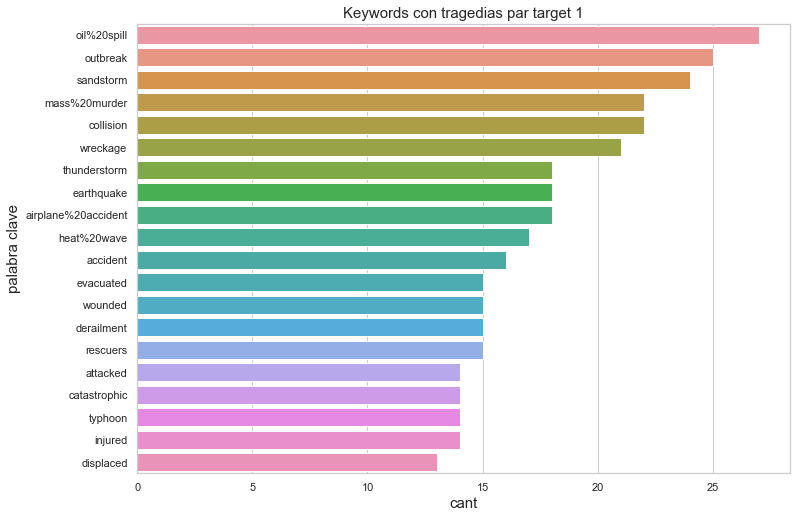

In [23]:
#KEYWORDS QUE CONTIENEN TRAGEDIAS PARA target=1
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=list_target1_matched.values, y=list_target1_matched.index)

ax.set_title("Keywords con tragedias par target 1",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

Text(0, 0.5, 'palabra clave')

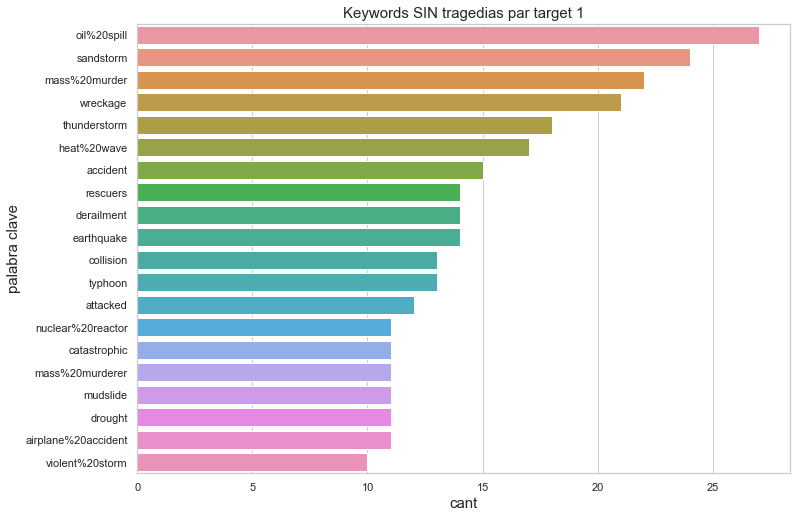

In [24]:
df_target1_unmatched = df_keywords_unmatched[df_keywords_unmatched['target']==1]
list_target1_unmatched = df_target1_unmatched['keyword'].value_counts().iloc[:20]

#KEYWORDS QUE NO CONTIENEN TRAGEDIAS PARA target=1
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=list_target1_unmatched.values, y=list_target1_unmatched.index)

ax.set_title("Keywords SIN tragedias par target 1",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

Text(0, 0.5, 'palabra clave')

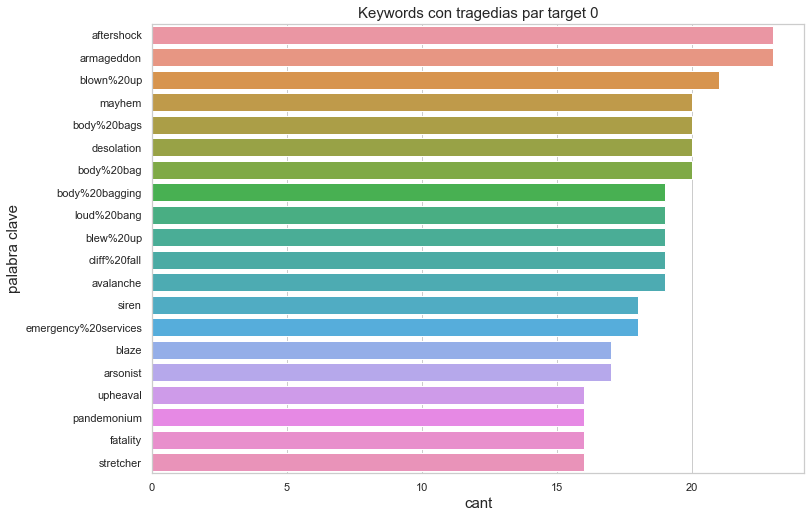

In [25]:
df_target0_matched = df_keywords_matched[df_keywords_matched['target']==0]
list_target0_matched = df_target0_matched['keyword'].value_counts().iloc[:20]

#KEYWORDS QUE CONTIENEN TRAGEDIAS PARA target=0
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=list_target0_matched.values, y=list_target0_matched.index)

ax.set_title("Keywords con tragedias par target 0",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

Text(0, 0.5, 'palabra clave')

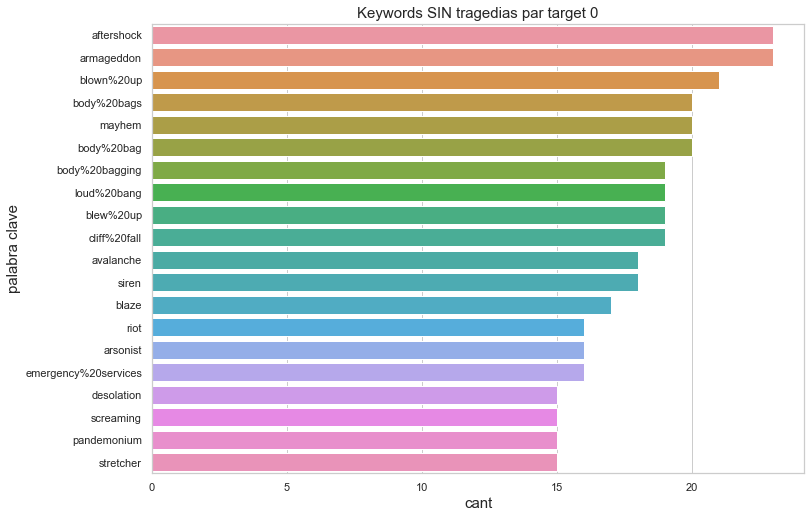

In [26]:
df_target0_unmatched = df_keywords_unmatched[df_keywords_unmatched['target']==0]
list_target0_unmatched = df_target0_unmatched['keyword'].value_counts().iloc[:20]

#KEYWORDS QUE NO CONTIENEN TRAGEDIAS PARA target=0
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=list_target0_unmatched.values, y=list_target0_unmatched.index)

ax.set_title("Keywords SIN tragedias par target 0",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [27]:
df_keywords_matched_grouped = df_keywords_matched.groupby(['keyword', 'target'])[['text']].count().reset_index()
df_keywords_matched_grouped['populares'] = df_keywords_matched_grouped['keyword'].isin(cant_keyword.index)
df_keywords_matched_grouped = df_keywords_matched_grouped[df_keywords_matched_grouped['populares']==True].sort_values(by='text', ascending=False)

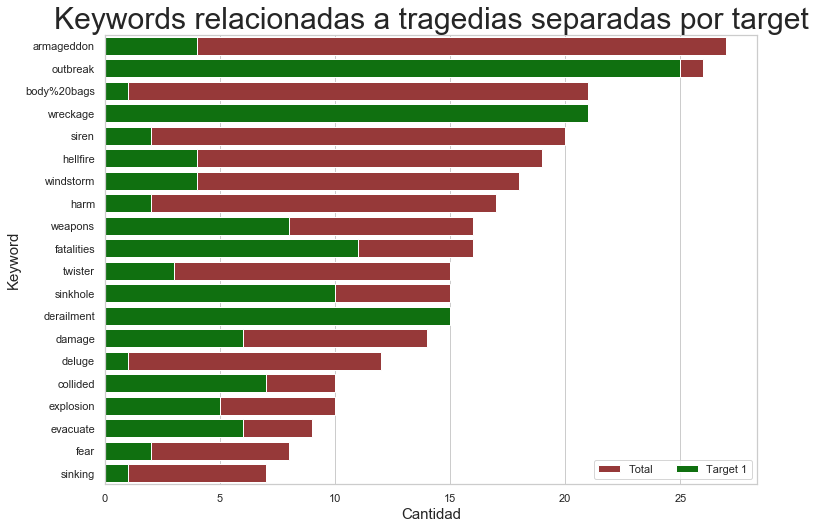

In [67]:
#comparacion de los que matchearon
df_target1 = df_keywords_matched_grouped[df_keywords_matched_grouped['target']==1].reset_index().rename(columns={'text':'cant_target1'})
df_target0 = df_keywords_matched_grouped[df_keywords_matched_grouped['target']==0].reset_index().rename(columns={'text':'cant_target0'})
df_totales = df_target1.merge(df_target0, how='outer', on='keyword')[['keyword', 'cant_target1', 'cant_target0' ]]
df_totales.fillna(0, inplace=True)
df_totales['cant_totales'] = df_totales['cant_target1'] + df_totales['cant_target0']
df_totales.sort_values(by='cant_totales', ascending = False, inplace=True)

#COMPARACION ENTRE TARGET 1 Y TARGET 0 DE LAS KEYWORDS MAS POPULARES MATCHEADOS
# Tamaño para hojas A4.
f, ax = plt.subplots(figsize=(11.7, 8.27))


sns.barplot(x='cant_totales', y='keyword', data=df_totales, label="Total", color="brown")            
sns.barplot(x='cant_target1', y="keyword", data=df_totales, label="Target 1", color="green")

ax.set_title("Keywords relacionadas a tragedias separadas por target",fontsize=30)
ax.set_xlabel("Cantidad",fontsize=15)
ax.set_ylabel("Keyword",fontsize=15)

ax.legend(ncol=2, loc="lower right", frameon=True)


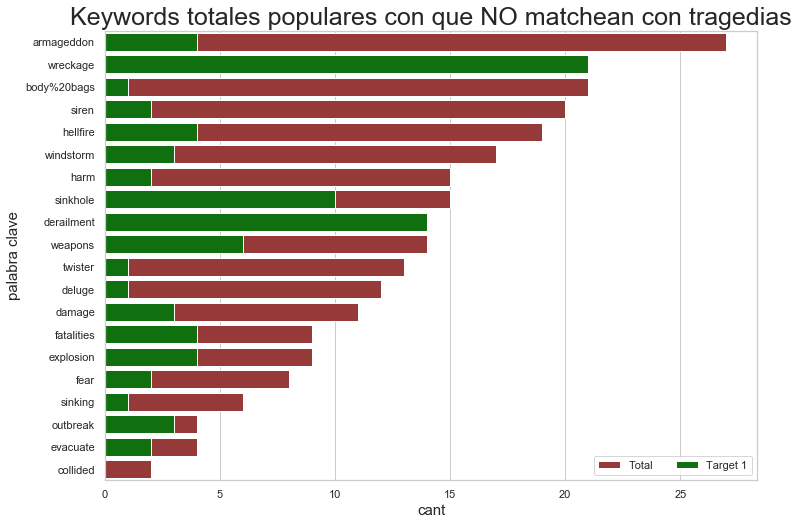

In [29]:
df_keywords_unmatched_grouped = df_keywords_unmatched.groupby(['keyword', 'target'])[['text']].count().reset_index()
df_keywords_unmatched_grouped['populares'] = df_keywords_unmatched_grouped['keyword'].isin(cant_keyword.index)
df_keywords_unmatched_grouped = df_keywords_unmatched_grouped[df_keywords_unmatched_grouped['populares']==True].sort_values(by='text', ascending=False)

#comparacion de los que NO matchearon
df_target1 = df_keywords_unmatched_grouped[df_keywords_unmatched_grouped['target']==1].reset_index().rename(columns={'text':'cant_target1'})
df_target0 = df_keywords_unmatched_grouped[df_keywords_unmatched_grouped['target']==0].reset_index().rename(columns={'text':'cant_target0'})
df_totales = df_target1.merge(df_target0, how='outer', on='keyword')[['keyword', 'cant_target1', 'cant_target0' ]]
df_totales.fillna(0, inplace=True)
df_totales['cant_totales'] = df_totales['cant_target1'] + df_totales['cant_target0']
df_totales.sort_values(by='cant_totales', ascending = False, inplace=True)

#COMPARACION ENTRE TARGET 1 Y TARGET 0 DE LAS KEYWORDS MAS POPULARES NO MATCHEADOS
# Tamaño para hojas A4.
f, ax = plt.subplots(figsize=(11.7, 8.27))


sns.barplot(x='cant_totales', y='keyword', data=df_totales, label="Total", color="brown")            
sns.barplot(x='cant_target1', y="keyword", data=df_totales, label="Target 1", color="green")

ax.set_title("Keywords totales populares con que NO matchean con tragedias",fontsize=25)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

ax.legend(ncol=2, loc="lower right", frameon=True)

# Keyword vs Hashtags 

In [30]:
def filtrarPalabras(miArray):
    variable = ''
    for key in miArray:
         if '#' in str(key):
            variable = variable + ' ' + str(key)
    return variable

In [31]:
df_hashtags = palabras_tragedias[['text', 'target', 'keyword', 'matches']]
df_hashtags.dropna(inplace=True)
df_hashtags['words'] = palabras_tragedias.text.str.strip().str.split()
df_hashtags = df_hashtags.assign(hashtags=[filtrarPalabras(el) for el in df_hashtags.words])
df_hashtags = df_hashtags[['keyword', 'hashtags', 'matches', 'target']].dropna(how='any')
df_hashtags['hashtags'] = df_hashtags['hashtags'].str.lower()
df_hashtags.head()

,keyword,hashtags,matches,target
31,ablaze,,1,1
32,ablaze,#metal #rt,0,0
33,ablaze,#africanbaze:,1,1
34,ablaze,,1,0
35,ablaze,,0,0


# Relacion entre Hashtags y keywords para todos los target

In [80]:
df_hashtags_keywords = pd.DataFrame(df_hashtags.hashtags.str.split(' ').tolist(), index=df_hashtags.keyword).stack()
df_hashtags_keywords = df_hashtags_keywords.reset_index([0, 'keyword'])
df_hashtags_keywords.columns = ['keyword', 'hashtags']
df_hashtags_keywords['hashtags'].replace('', np.nan, inplace=True)
df_hashtags_keywords = df_hashtags_keywords.dropna()
df_hashtags_keywords.drop_duplicates(inplace=True)

#hashtags con mas de 5 apariciones
hashtags_mas_usados = df_hashtags_keywords.groupby('hashtags')[['keyword']].count().reset_index().sort_values(by='keyword', ascending=False)
hashtags_mas_usados = hashtags_mas_usados[hashtags_mas_usados['keyword']>4]
hashtags_mas_usados.head()


,hashtags,keyword
862,#news,31
896,#nowplaying,17
577,#hiroshima,10
1221,#tcot,7
673,#jobs,7


In [33]:
df_hashtags_keywords['popular'] = df_hashtags_keywords['hashtags'].isin(hashtags_mas_usados['hashtags'])
df_hashtags_keywords = df_hashtags_keywords[df_hashtags_keywords['popular']==True]
df_hashtags_keywords.head()

,keyword,hashtags,popular
158,airplane%20accident,#news,True
203,airplane%20accident,#,True
411,arsonist,#nowplaying,True
462,attack,#news,True
585,bioterror,#news,True


In [34]:
df_hashtags_keywords.shape

(108, 3)

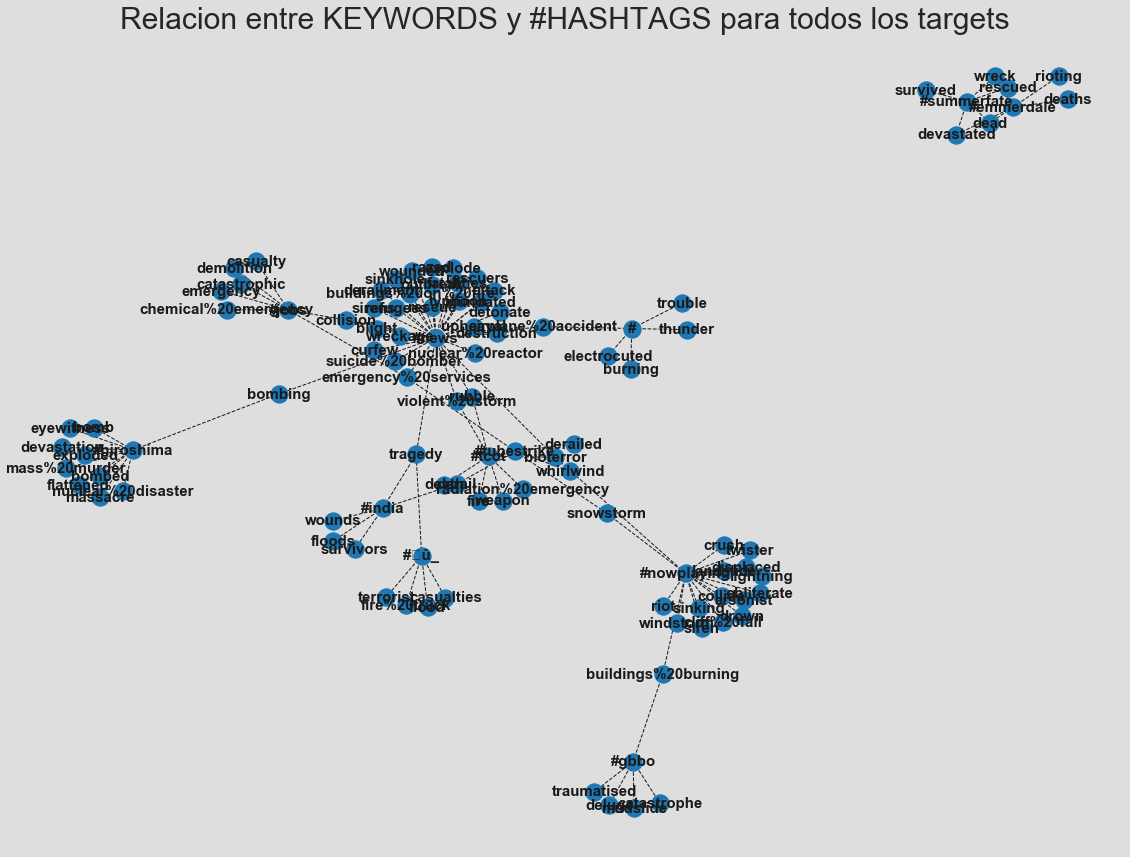

In [68]:
import networkx as nx

# Tamaño para hojas A4.
f, ax = plt.subplots(figsize=(20,15))

G=nx.from_pandas_edgelist(df_hashtags_keywords, 'hashtags', 'keyword')
nx.draw(G, with_labels=True, font_size=15, style='dashed', font_weight ='bold')

f.set_facecolor((0.85, 0.85, 0.85, 0.85))
ax.set_title("Relacion entre KEYWORDS y #HASHTAGS para todos los targets",fontsize=30)
plt.show()


# Relacion entre Hashtags y keywords target==1

In [36]:
df_hashtag_target1 = df_hashtags[df_hashtags['target']==1]

In [37]:
#Separo los hashtags, 1 por fila y dropeo los que no tienen ninguno
df_hashtags_keywords_target1 = pd.DataFrame(df_hashtag_target1.hashtags.str.split(' ').tolist(), index=df_hashtag_target1.keyword).stack()
df_hashtags_keywords_target1 = df_hashtags_keywords_target1.reset_index([0, 'keyword'])
df_hashtags_keywords_target1.columns = ['keyword', 'hashtags']
df_hashtags_keywords_target1['hashtags'].replace('', np.nan, inplace=True)
df_hashtags_keywords_target1 = df_hashtags_keywords_target1.dropna()
df_hashtags_keywords_target1.drop_duplicates(inplace=True)


#hashtags con mas de 5 apariciones
hashtags_mas_usados = df_hashtags_keywords_target1.groupby('hashtags')[['keyword']].count().reset_index().sort_values(by='keyword', ascending=False)
hashtags_mas_usados = hashtags_mas_usados[hashtags_mas_usados['keyword']>3]
hashtags_mas_usados.head(50)


,hashtags,keyword
434,#news,23
293,#hiroshima,10
316,#india,5
111,#breaking,4
706,#wx,4
700,#world,4
692,#wildfire,4
437,#newyork,4
726,#û_,4
469,#okwx,4


In [38]:
df_hashtags_keywords_target1['popular'] = df_hashtags_keywords_target1['hashtags'].isin(hashtags_mas_usados['hashtags'])
df_hashtags_keywords_target1 = df_hashtags_keywords_target1[df_hashtags_keywords_target1['popular']==True]

In [39]:
df_hashtags_keywords_target1.shape

(70, 3)

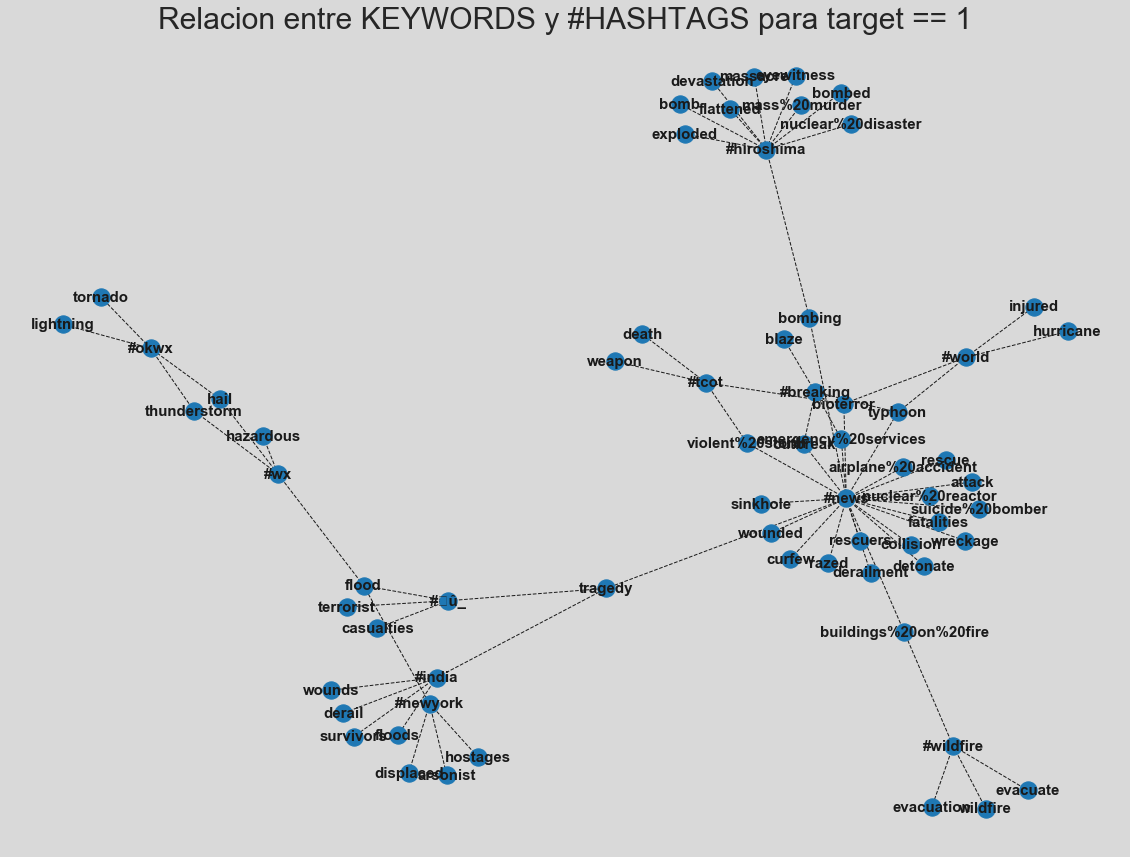

In [69]:
import networkx as nx

f, ax = plt.subplots(figsize=(20,15))

G=nx.from_pandas_edgelist(df_hashtags_keywords_target1, 'hashtags', 'keyword')
nx.draw(G, with_labels=True, font_size=15, style='dashed', font_weight ='bold')

f.set_facecolor((0.85, 0.85, 0.85))
ax.set_title("Relacion entre KEYWORDS y #HASHTAGS para target == 1",fontsize=30)
plt.show()


# Relacion entre Hashtags y keywords target==0

In [41]:
df_hashtag_target0 = df_hashtags[df_hashtags['target']==0]

In [42]:
#Separo los hashtags, 1 por fila y dropeo los que no tienen ninguno
df_hashtags_keywords_target0 = pd.DataFrame(df_hashtag_target0.hashtags.str.split(' ').tolist(), index=df_hashtag_target0.keyword).stack()
df_hashtags_keywords_target0 = df_hashtags_keywords_target0.reset_index([0, 'keyword'])
df_hashtags_keywords_target0.columns = ['keyword', 'hashtags']
df_hashtags_keywords_target0['hashtags'].replace('', np.nan, inplace=True)
df_hashtags_keywords_target0 = df_hashtags_keywords_target0.dropna()
df_hashtags_keywords_target0.drop_duplicates(inplace=True)

#hashtags con mas de 5 apariciones
hashtags_mas_usados = df_hashtags_keywords_target0.groupby('hashtags')[['keyword']].count().reset_index().sort_values(by='keyword', ascending=False)
hashtags_mas_usados = hashtags_mas_usados[hashtags_mas_usados['keyword']>4]
hashtags_mas_usados.head()


,hashtags,keyword
511,#nowplaying,16
495,#news,8
389,#jobs,7
291,#gbbo,5
687,#summerfate,5


In [43]:
df_hashtags_keywords_target0['popular'] = df_hashtags_keywords_target0['hashtags'].isin(hashtags_mas_usados['hashtags'])
df_hashtags_keywords_target0 = df_hashtags_keywords_target0[df_hashtags_keywords_target0['popular']==True]

In [44]:
df_hashtags_keywords_target0.shape

(46, 3)

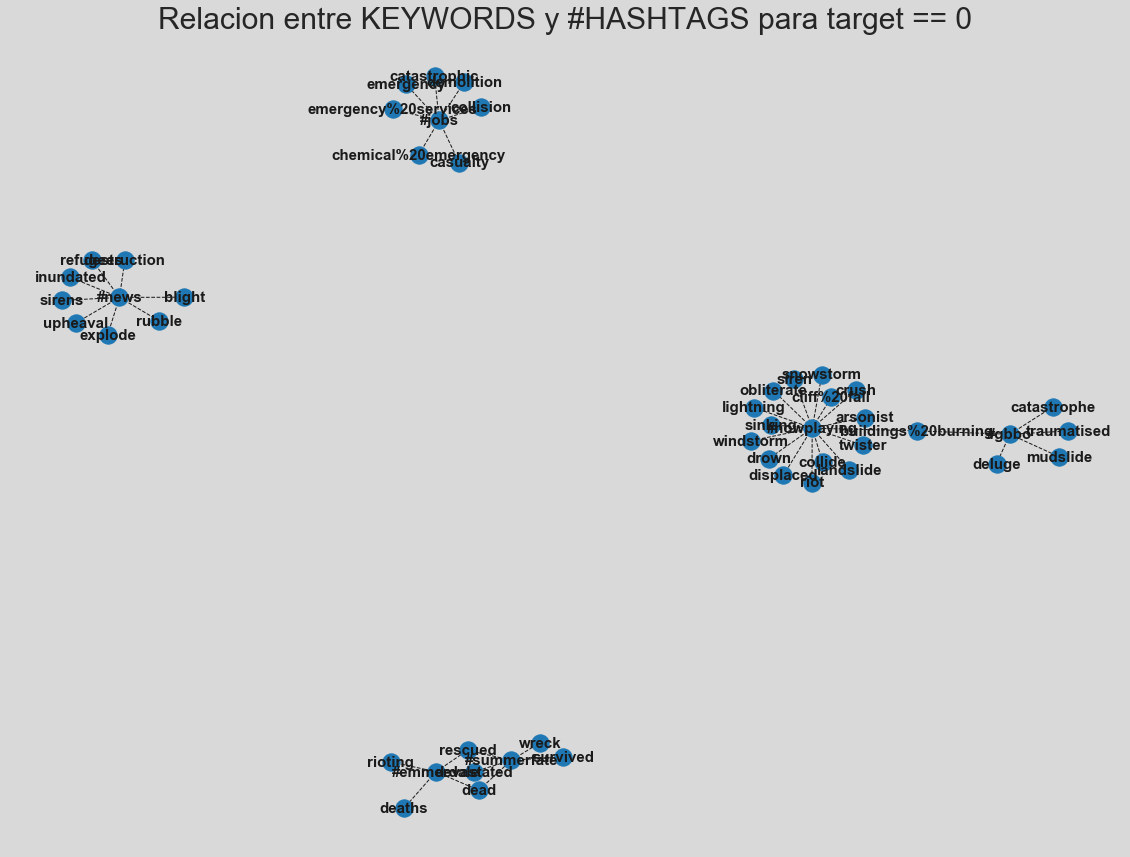

In [70]:
import networkx as nx

# Tamaño para hojas A4.
f, ax = plt.subplots(figsize=(20,15))

G=nx.from_pandas_edgelist(df_hashtags_keywords_target0, 'hashtags', 'keyword')
nx.draw(G, with_labels=True, font_size=15, style='dashed', font_weight ='bold')

f.set_facecolor((0.85, 0.85, 0.85))
ax.set_title("Relacion entre KEYWORDS y #HASHTAGS para target == 0",fontsize=30)
plt.show()


# ANALISIS SIGNOS DE EXCLAMACION/PREGUNTA

In [46]:
signs = nlp[['keyword', 'target', 'text']]
signs.dropna(inplace=True)
signs.head()

,keyword,target,text
31,ablaze,1,@bbcmtd Wholesale Markets ablaze http://t.co/l...
32,ablaze,0,We always try to bring the heavy. #metal #RT h...
33,ablaze,1,#AFRICANBAZE: Breaking news:Nigeria flag set a...
34,ablaze,0,Crying out for more! Set me ablaze
35,ablaze,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...


In [47]:
signs['ask'] = signs['text'].str.count('[!]') + signs['text'].str.count('[?]')
signs_agrupado = signs.groupby('target').sum().rename(columns={'ask':'cantidad'}).reset_index()
signs_agrupado.head(15)

,target,cantidad
0,0,3193
1,1,1073


Text(0, 0.5, 'Cantidad')

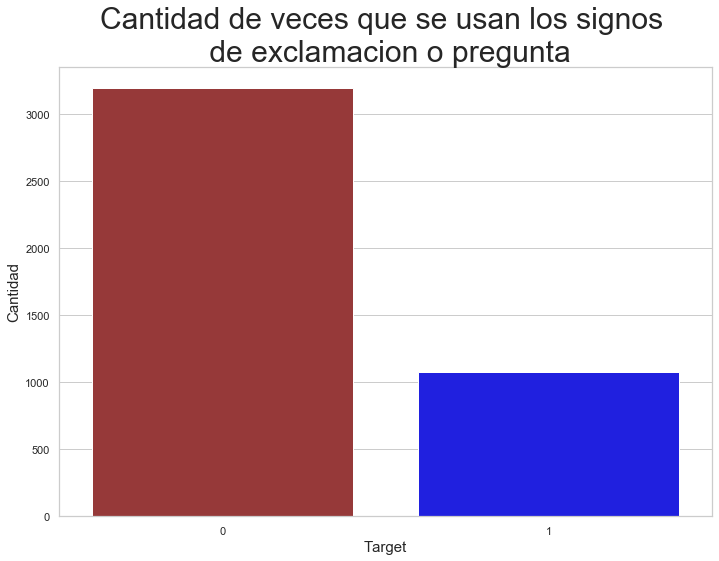

In [72]:
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x='target', y='cantidad', data=signs_agrupado, palette=["brown", "blue"])

ax.set_title("Cantidad de veces que se usan los signos \n de exclamacion o pregunta",fontsize=30)
ax.set_xlabel("Target",fontsize=15)
ax.set_ylabel("Cantidad",fontsize=15)